In [135]:
%pylab inline
import pandas
import seaborn
import pandas_profiling
import numpy
import matplotlib
import geopandas
import fiona
import shapely
import os
import shapely
import fiona
import matplotlib.pyplot as plt


Populating the interactive namespace from numpy and matplotlib


# Analyzing The Datas

In [141]:
mapdata = geopandas.read_file('NSW_LOCALITY_POLYGON_shp.shp')

In [142]:
data = pandas.read_csv('listings.csv')

In [147]:
mapdata.head()

,LC_PLY_PID,DT_CREATE,DT_RETIRE,LOC_PID,NSW_LOCALI,NSW_LOCA_1,NSW_LOCA_2,NSW_LOCA_3,NSW_LOCA_4,NSW_LOCA_5,NSW_LOCA_6,NSW_LOCA_7,geometry
0,25065,2015-09-03,None,NSW2557,2015-11-10,None,MAYFIELD WEST,None,None,G,None,1,"POLYGON ((151.73344571654 -32.87974104891, 151..."
1,16193,2011-11-22,None,NSW4136,2012-02-04,None,WALLACETOWN,None,None,G,None,1,"POLYGON ((147.450924738497 -34.9651865379095, ..."
2,24903,2015-09-03,None,NSW1012,2015-11-10,None,CONCORD,None,None,G,None,1,"POLYGON ((151.10074278046 -33.84456767407, 151..."
3,19660,2012-11-21,None,NSW4098,2013-01-23,None,UTUNGUN,None,None,G,None,1,"POLYGON ((152.805912214383 -30.710969747357, 1..."
4,25101,2015-09-03,None,NSW4391,2015-11-10,None,WOLLSTONECRAFT,None,None,G,None,1,"POLYGON ((151.19807629946 -33.82565730712, 151..."


In [ ]:
pandas_profiling.ProfileReport(data)

# Categorising The Data

In [10]:
data.drop(['availability_365', 'minimum_nights', 'neighbourhood', 'room_type'],axis=1).head()

,id,name,host_id,host_name,neighbourhood_group,latitude,longitude,price,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count
0,11156,An Oasis in the City,40855,Colleen,NaN,-33.86917,151.22656,65,185,2019-04-24,1.58,1
1,12351,Sydney City & Harbour at the door,17061,Stuart,NaN,-33.86515,151.19190,14316,516,2019-06-29,4.73,2
2,14250,Manly Harbour House,55948,Heidi,NaN,-33.80093,151.26172,470,2,2019-01-02,0.05,2
3,15253,Stunning Penthouse Apartment In Heart Of The City,59850,Morag,NaN,-33.88045,151.21654,110,323,2019-05-23,3.60,3
4,20865,3 BED HOUSE + 1 BED STUDIO Balmain,64282,Fiona,NaN,-33.85907,151.17275,450,16,2019-01-03,0.17,1


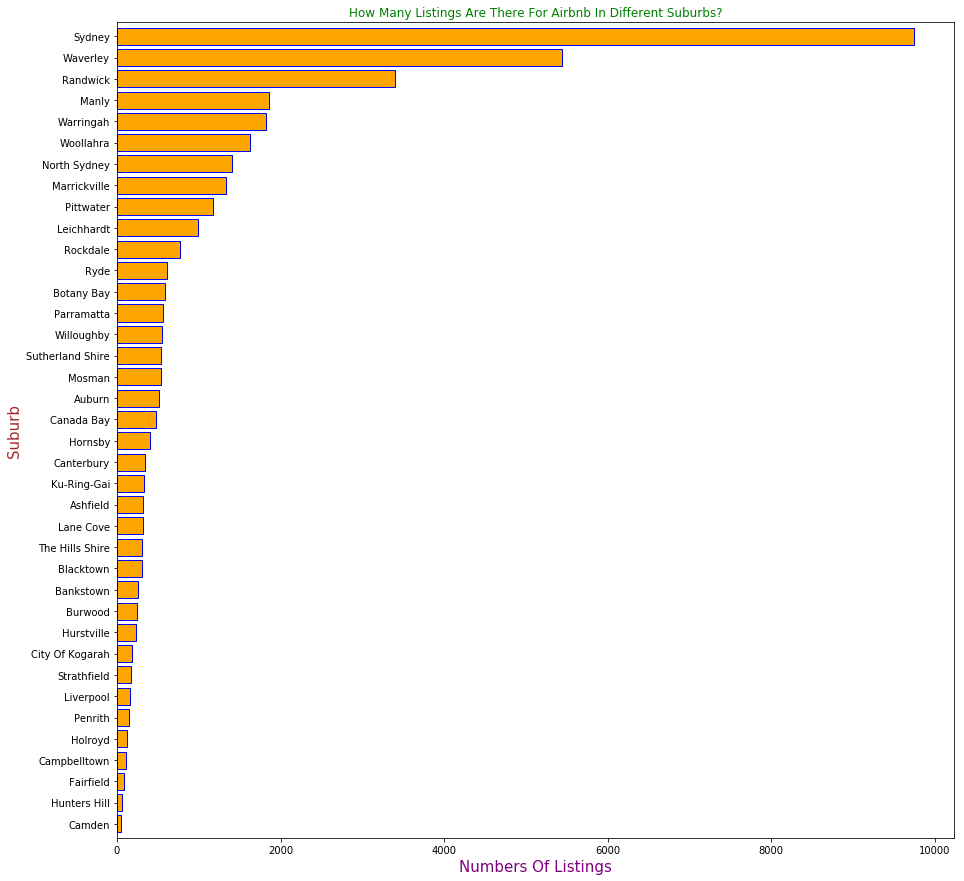

In [11]:
pandas.value_counts(data['neighbourhood']).plot(kind='barh', color = 'orange', width=0.8,figsize=(15,15),edgecolor='blue').invert_yaxis()
plt.title('How Many Listings Are There For Airbnb In Different Suburbs?', color = 'g')
plt.ylabel('Suburb', color = 'brown',size=15)
plt.xlabel('Numbers Of Listings', color = 'purple',size=15)
plt.show()

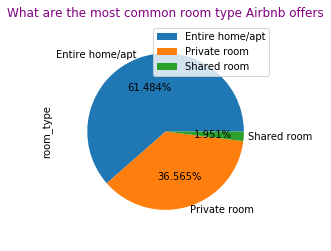

In [12]:
pandas.value_counts(data['room_type']).plot(kind='pie', radius=0.9, labeldistance=1.05, autopct='%1.3f%%', legend = 1)
plt.title('What are the most common room type Airbnb offers', color = 'purple')
plt.show()

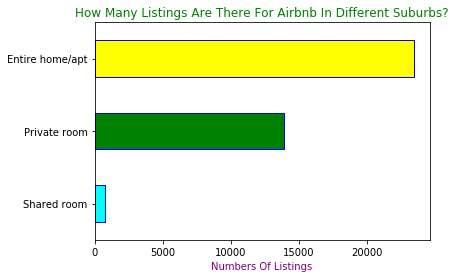

In [13]:
pandas.value_counts(data['room_type']).plot(kind='barh',color=['yellow', 'green', 'cyan'], edgecolor='blue').invert_yaxis()
plt.title('How Many Listings Are There For Airbnb In Different Suburbs?', color = 'g')
plt.xlabel('Numbers Of Listings', color = 'purple')
plt.show()

In [63]:
data['minimum_nights'] > 7
filtered_data = data['minimum_nights'][data['minimum_nights'] > 7]

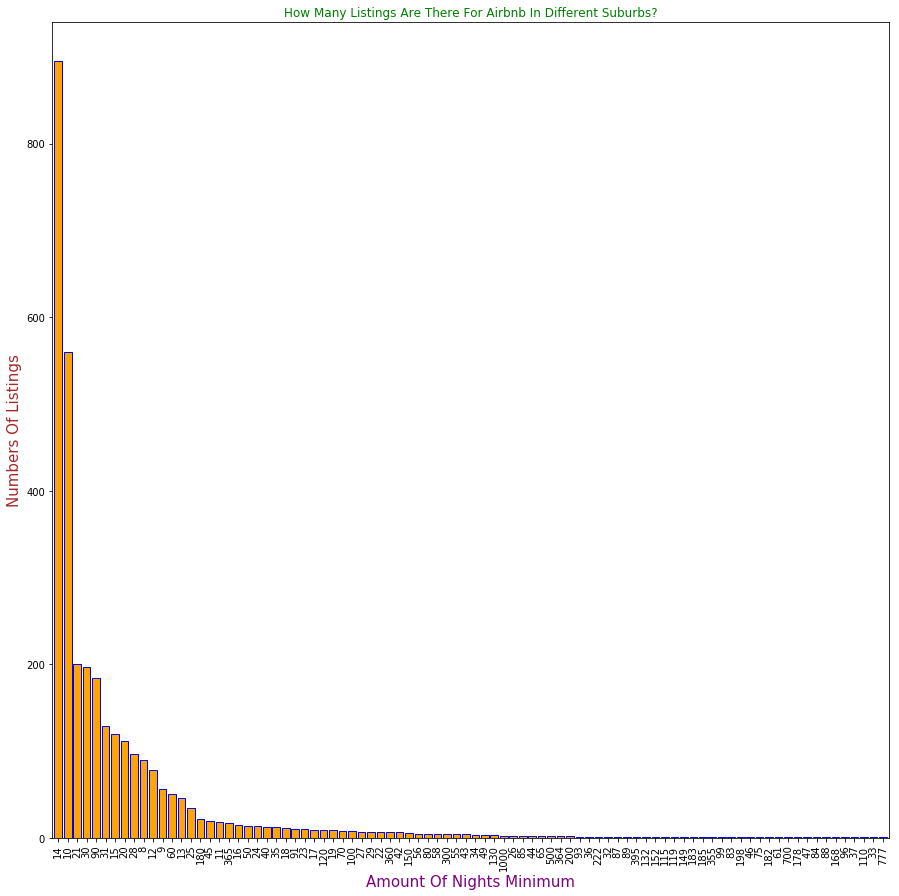

In [31]:
pandas.value_counts(filtered_data).plot(kind='bar', color = 'orange', width=0.8,figsize=(15,15),edgecolor='blue')
plt.title('How Many Listings Are There For Airbnb In Different Suburbs?', color = 'g')
plt.ylabel('Numbers Of Listings', color = 'brown',size=15)
plt.xlabel('Amount Of Nights Minimum', color = 'purple',size=15)
plt.show()

# How does different suburbs compare in terms of their room types?

''

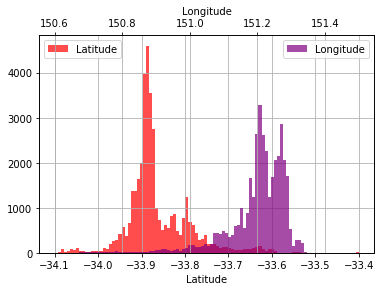

In [32]:
hist(data['latitude'], bins = 100, range = (-34.1, -33.4), rwidth = 1, alpha = .7, color = "Red", label = 'Latitude')
xlabel("Latitude")
grid()
legend(loc="upper left")
twiny()
hist(data['longitude'], bins = 100, range = (150.6, 151.5), rwidth = 1, alpha = .7, color = "Purple", label = 'Longitude')
xlabel("Longitude")
grid()
legend(loc="upper right")
;

Text(0.5, 0, 'Longitude')

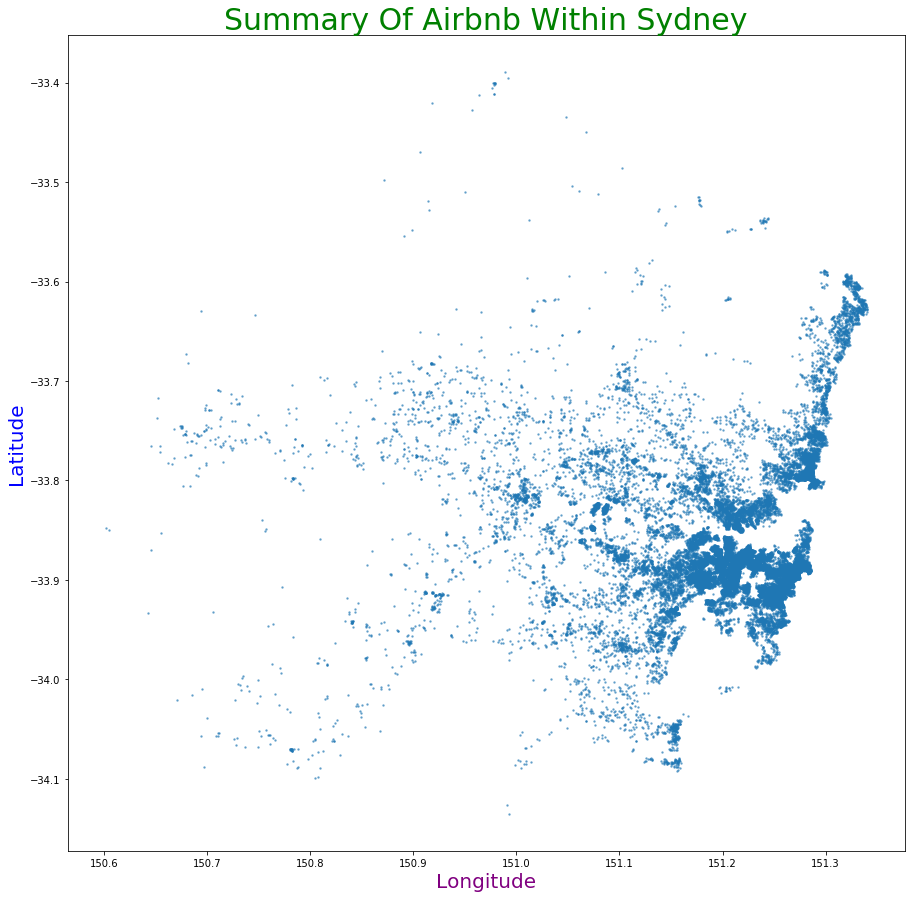

In [33]:
figure(figsize=(15,15))
plot((data['longitude']), data['latitude'], '.',ms=3, alpha=.5)
plt.title('Summary Of Airbnb Within Sydney', color = 'green',size=30)
plt.ylabel('Latitude', color = 'b',size=20)
plt.xlabel('Longitude', color = 'purple', size=20)

#Aparrtment show red House color other 

In [34]:
list = []
for type in data['room_type']:
    if type >= str("Private Room"):
        list.append(True)
    else:
        list.append(False)

In [35]:
list[0:5]

[True, True, False, True, False]

In [36]:
len(list)

38080

In [37]:
privateapt = pandas.Series(list)

In [38]:
privateapt.head()

0     True
1     True
2    False
3     True
4    False
dtype: bool

In [39]:
data[privateapt]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,11156,An Oasis in the City,40855,Colleen,NaN,Sydney,-33.86917,151.22656,Private room,65,2,185,2019-04-24,1.58,1,354
1,12351,Sydney City & Harbour at the door,17061,Stuart,NaN,Sydney,-33.86515,151.19190,Private room,14316,2,516,2019-06-29,4.73,2,19
3,15253,Stunning Penthouse Apartment In Heart Of The City,59850,Morag,NaN,Sydney,-33.88045,151.21654,Private room,110,2,323,2019-05-23,3.60,3,336
5,26174,"COZY PRIVATE ROOM, GREAT LOCATION!",110561,Amanda,NaN,Woollahra,-33.88909,151.25940,Private room,62,1,45,2019-03-29,0.45,1,181
15,65635,Russell Hutchinson - 1st Bedroom,320878,Russell,NaN,Lane Cove,-33.81079,151.16072,Private room,55,1,166,2019-06-07,1.60,7,76
16,66009,Comfort & space in the heart of Paddington,322887,Belinda,NaN,Woollahra,-33.88327,151.22725,Private room,99,3,1,2014-02-28,0.02,1,0
17,67112,Quiet base to explore Sydney,160705,Liz,NaN,Marrickville,-33.91500,151.14030,Private room,75,3,22,2015-04-17,0.22,1,363
18,68999,A little bit of Sydney - Australia,333581,Brian,NaN,Hornsby,-33.72990,151.05138,Private room,89,3,47,2019-05-18,0.48,1,163
22,73628,Sunny Room in Art Deco,385108,Dan,NaN,Waverley,-33.88672,151.26656,Private room,65,3,8,2018-03-17,0.08,2,0
23,73639,Sydney City Home with Harbour Views,17061,Stuart,NaN,Sydney,-33.86585,151.19233,Private room,14316,1,383,2019-06-30,3.78,2,33


In [40]:
list2 = []
for type in data['room_type']:
    if type >= str("Shared Room"):
        list2.append(True)
    else:
        list2.append(False)

In [41]:
shared = pandas.Series(list2)

In [43]:
list3 = []
for type in data['room_type']:
    if type == str("Entire home/apt"):
        list3.append(True)
    else:
        list3.append(False)

In [44]:
list3[0:5]

[False, False, True, False, True]

In [45]:
entire = pandas.Series(list3)

In [46]:
data[entire]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,14250,Manly Harbour House,55948,Heidi,NaN,Manly,-33.80093,151.26172,Entire home/apt,470,5,2,2019-01-02,0.05,2,99
4,20865,3 BED HOUSE + 1 BED STUDIO Balmain,64282,Fiona,NaN,Leichhardt,-33.85907,151.17275,Entire home/apt,450,7,16,2019-01-03,0.17,1,142
6,38073,Modern apartment with pool and parking,103476,Prasanna,NaN,North Sydney,-33.83443,151.20887,Entire home/apt,159,2,63,2017-09-16,0.60,2,187
7,39348,Large Bondi studio,168828,Marie,NaN,Waverley,-33.88482,151.28295,Entire home/apt,85,5,10,2019-01-04,0.67,1,8
8,44545,Sunny Darlinghurst Warehouse Apartment,112237,Atari,NaN,Sydney,-33.87996,151.21553,Entire home/apt,130,3,60,2019-03-20,0.56,1,52
9,57183,BONDI BEACHFRONT CENTRAL LOCATION,1623151,Susan,NaN,Waverley,-33.89185,151.27308,Entire home/apt,174,4,129,2019-06-20,1.24,1,94
10,58506,"Studio Yindi @ Mosman, Sydney",279955,John,NaN,Mosman,-33.81927,151.23652,Entire home/apt,140,2,251,2019-06-01,2.42,1,263
11,58954,Christmas New Year - eastern Sydney,282630,Peter,NaN,Waverley,-33.89176,151.24259,Entire home/apt,1117,7,0,NaN,NaN,1,365
12,61721,"2br Eclectic Stylish Home, 2 mins to Bondi Beach",299170,Eilish,NaN,Waverley,-33.88890,151.27726,Entire home/apt,245,4,25,2019-02-26,0.25,1,267
13,63795,Tree Tops Retreat Avalon Beach,311659,Tracey,NaN,Pittwater,-33.62612,151.33151,Entire home/apt,150,2,63,2019-04-27,0.62,1,319


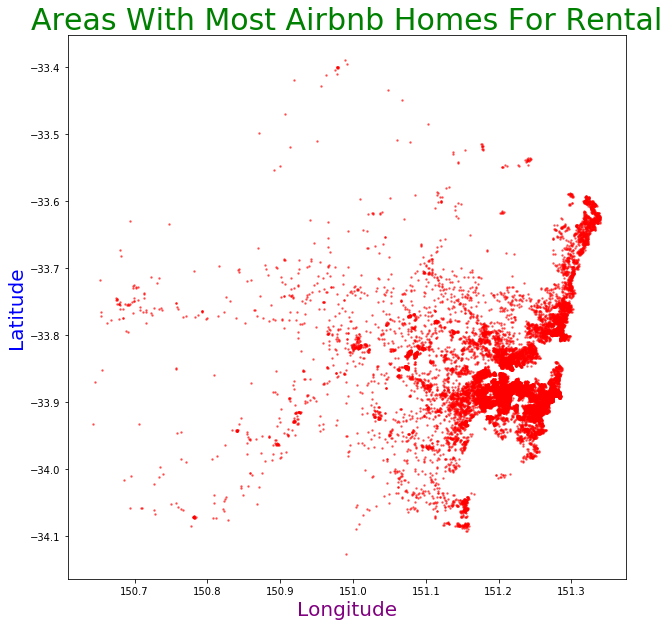

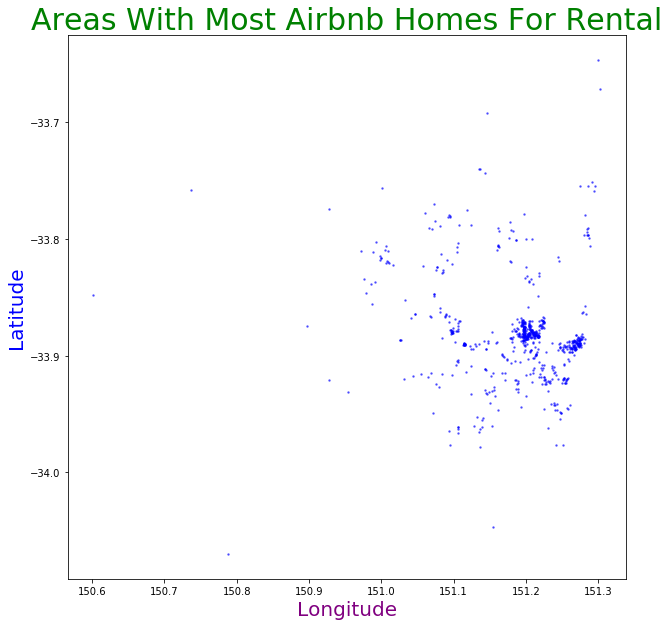

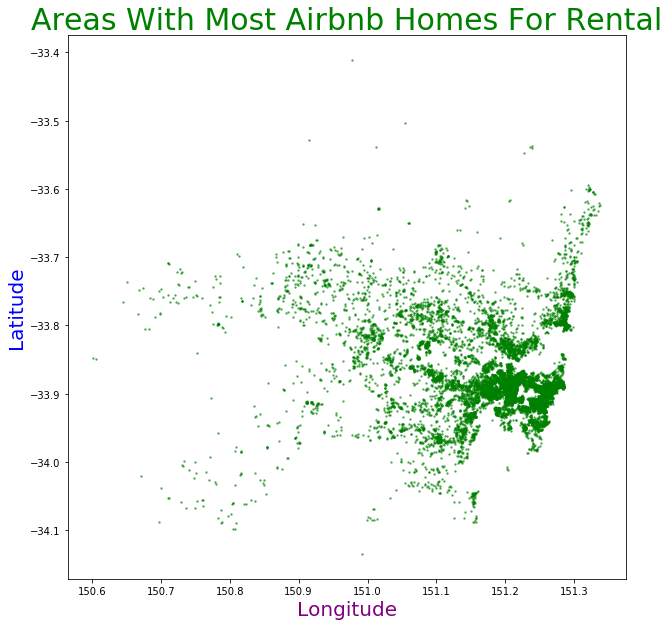

In [47]:
loc1 = data[entire]
loc2 = data[shared]
loc3 = data[privateapt]

figure(figsize=(10,10))
plot((loc1['longitude']), loc1['latitude'], '.',color = 'red', ms=3, alpha=.5)
plt.title('Areas With Most Airbnb Homes For Rental', color = 'green',size=30)
plt.ylabel('Latitude', color = 'b',size=20)
plt.xlabel('Longitude', color = 'purple', size=20)
plt.show()

figure(figsize=(10,10))
plot((loc2['longitude']), loc2['latitude'], '.',color = 'blue', ms=3, alpha=.5)
plt.title('Areas With Most Airbnb Homes For Rental', color = 'green',size=30)
plt.ylabel('Latitude', color = 'b',size=20)
plt.xlabel('Longitude', color = 'purple', size=20)
plt.show()

figure(figsize=(10,10))
plot((loc3['longitude']), loc3['latitude'], '.',color = 'green', ms=3, alpha=.5)
plt.title('Areas With Most Airbnb Homes For Rental', color = 'green',size=30)
plt.ylabel('Latitude', color = 'b',size=20)
plt.xlabel('Longitude', color = 'purple', size=20)
plt.show()

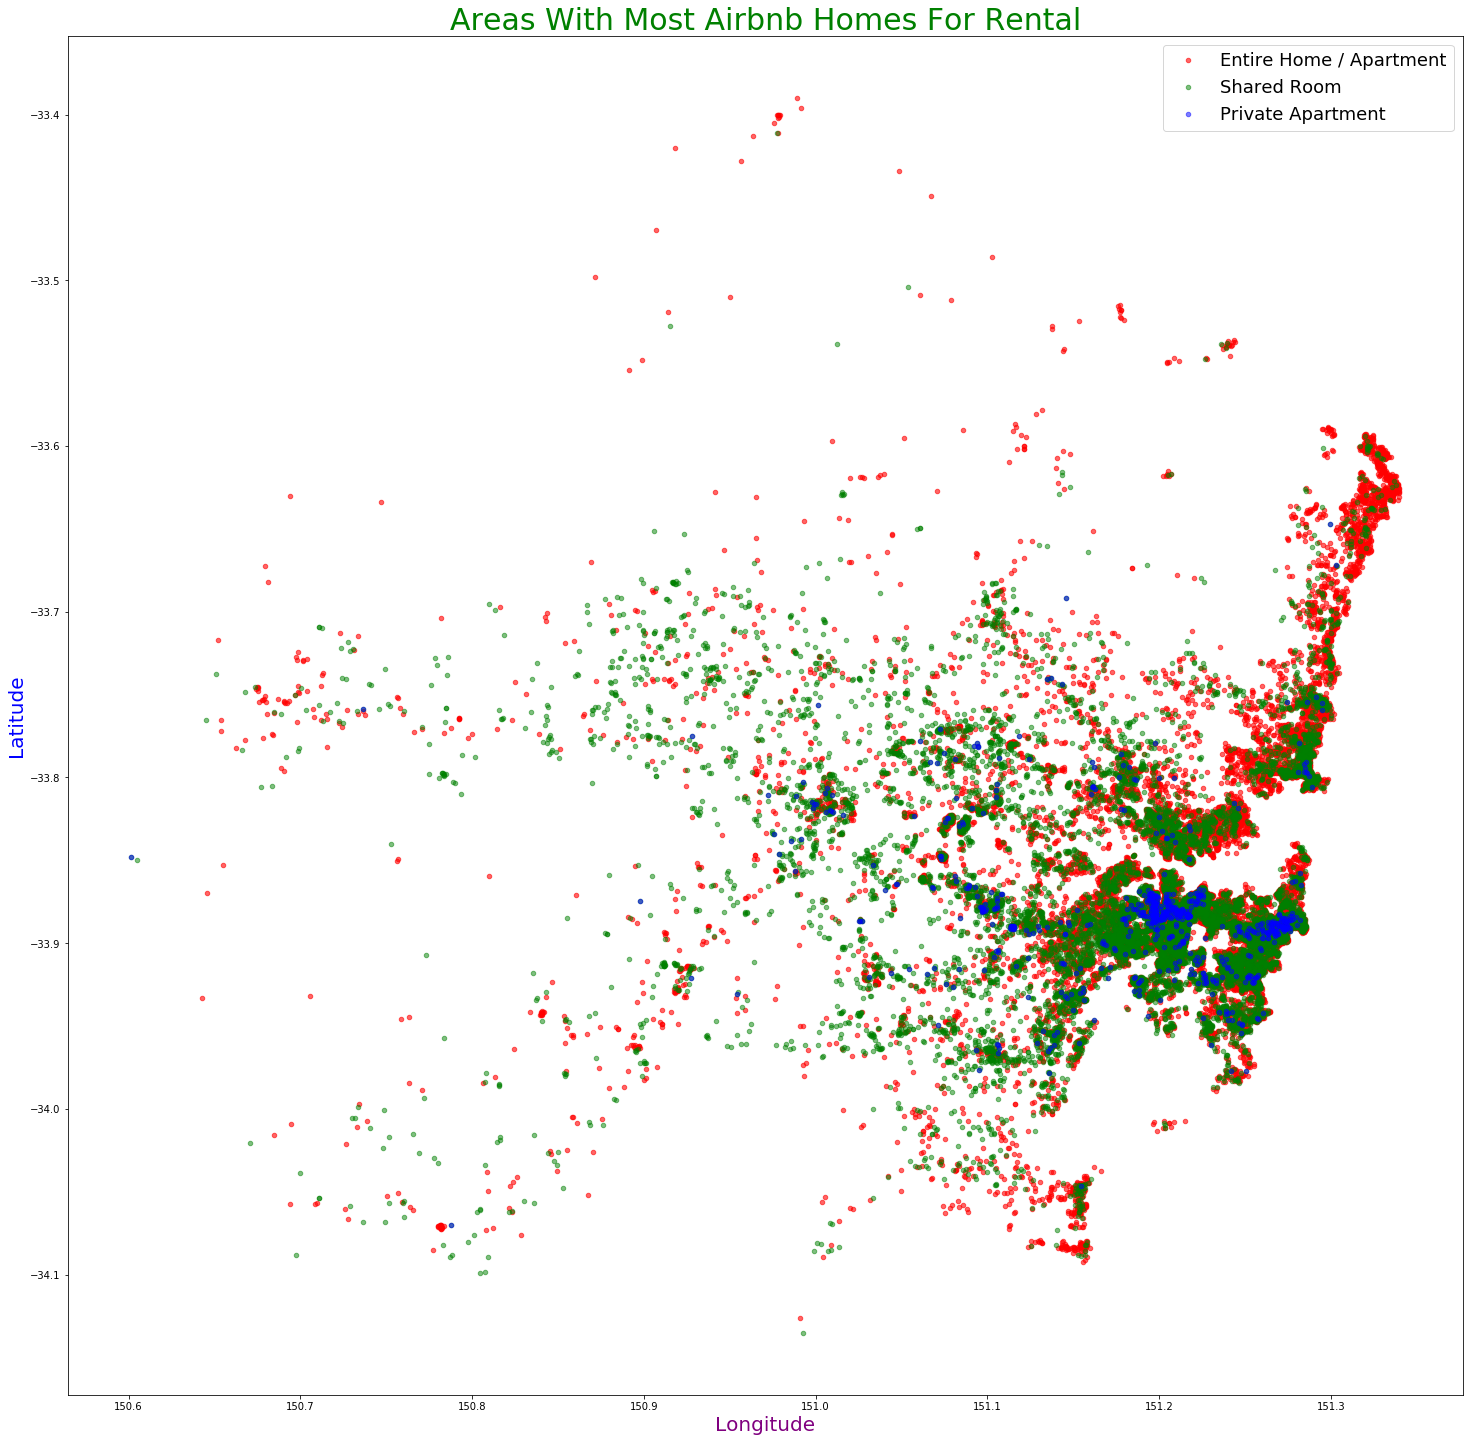

In [48]:
loc1 = data[entire]
loc2 = data[shared]
loc3 = data[privateapt]

figure(figsize=(25,25))
plot((loc1['longitude']), loc1['latitude'], '.',color = 'red', ms=9, alpha=.6, label = 'Entire Home / Apartment')
plot((loc3['longitude']), loc3['latitude'], '.',color = 'green', ms=9, alpha=.5, label = 'Shared Room')
plot((loc2['longitude']), loc2['latitude'], '.',color = 'blue', ms=9, alpha=.5, label = 'Private Apartment')
plt.legend(fontsize=18)
plt.title('Areas With Most Airbnb Homes For Rental', color = 'green',size=30)
plt.ylabel('Latitude', color = 'b',size=20)
plt.xlabel('Longitude', color = 'purple', size=20)
plt.show()

In [76]:
data = gp.GeoDataFrame.from_file(shp_file_name)

id                                               11156
name                              An Oasis in the City
host_id                                          40855
host_name                                      Colleen
neighbourhood_group                                NaN
neighbourhood                                   Sydney
latitude                                      -33.8692
longitude                                      151.227
room_type                                 Private room
price                                               65
minimum_nights                                       2
number_of_reviews                                  185
last_review                                 2019-04-24
reviews_per_month                                 1.58
calculated_host_listings_count                       1
availability_365                                   354
Name: 0, dtype: object


-33.869170000000004

In [9]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,11156,An Oasis in the City,40855,Colleen,NaN,Sydney,-33.86917,151.22656,Private room,65,2,185,2019-04-24,1.58,1,354
1,12351,Sydney City & Harbour at the door,17061,Stuart,NaN,Sydney,-33.86515,151.19190,Private room,14316,2,516,2019-06-29,4.73,2,19
2,14250,Manly Harbour House,55948,Heidi,NaN,Manly,-33.80093,151.26172,Entire home/apt,470,5,2,2019-01-02,0.05,2,99
3,15253,Stunning Penthouse Apartment In Heart Of The City,59850,Morag,NaN,Sydney,-33.88045,151.21654,Private room,110,2,323,2019-05-23,3.60,3,336
4,20865,3 BED HOUSE + 1 BED STUDIO Balmain,64282,Fiona,NaN,Leichhardt,-33.85907,151.17275,Entire home/apt,450,7,16,2019-01-03,0.17,1,142


In [57]:
data[shared].groupby("neighbourhood").mean()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood,,,,,,,,,,,
Ashfield,2.754297e+07,1.584290e+08,NaN,-33.890648,151.119304,28.782609,4.347826,3.521739,0.423158,29.869565,229.956522
Auburn,2.256389e+07,1.224266e+08,NaN,-33.846791,151.061642,81.000000,1.300000,6.700000,0.441250,1.200000,17.200000
Bankstown,3.250068e+07,2.436933e+08,NaN,-33.902393,151.034593,43.000000,1.833333,0.500000,0.190000,3.666667,74.000000
Blacktown,2.894391e+07,1.989392e+08,NaN,-33.774690,150.927870,65.000000,7.000000,0.000000,NaN,1.000000,174.000000
Botany Bay,2.433052e+07,1.493899e+08,NaN,-33.929403,151.192634,57.090909,3.363636,3.636364,1.178333,1.636364,127.181818
Burwood,2.647261e+07,1.300671e+08,NaN,-33.877915,151.100654,33.666667,3.375000,1.541667,0.268824,18.583333,119.333333
Campbelltown,3.045477e+07,9.133496e+07,NaN,-34.069940,150.787800,49.000000,1.000000,8.000000,1.150000,1.000000,18.000000
Canada Bay,1.897320e+07,9.518155e+07,NaN,-33.843152,151.087384,53.800000,4.200000,0.400000,0.040000,1.200000,72.600000
Canterbury,2.760216e+07,1.144064e+08,NaN,-33.913434,151.094436,40.083333,2.583333,5.750000,0.825000,2.416667,200.083333


In [69]:
data.drop(['id', 'host_id', 'neighbourhood_group', 'latitude', 'longitude', 'host_name', 'name', 'room_type', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365'],axis=1).head(10)

,neighbourhood,price
0,Sydney,65
1,Sydney,14316
2,Manly,470
3,Sydney,110
4,Leichhardt,450
5,Woollahra,62
6,North Sydney,159
7,Waverley,85
8,Sydney,130
9,Waverley,174


In [ ]:
data[["neighbourhood", "price"]].head(10).plot(kind="bar")

In [ ]:
# panda merge